In [ ]:
!pip uninstall tensorflow

!pip install tensorflow==2.2.0

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0
  Using cached https://files.pythonhosted.org/packages/3d/be/679ce5254a8c8d07470efb4a4c00345fae91f766e64f1c2aece8796d7218/tensorflow-2.2.0-cp36-cp36m-manylinux2010_x86_64.whl


In [ ]:
!pip install tqdm
!pip install tqdm --upgrade

     |████████████████████████████████| 71kB 3.4MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


## Librerias

In [1]:
import random
import pandas as pd
import numpy as np
import os
from statistics import mean 
import operator
import matplotlib.pyplot as plt
from PIL import Image
import itertools
from IPython.display import Image as printModel

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from keras.models import load_model
from keras.preprocessing import image as krs_image
from keras_preprocessing.image import ImageDataGenerator
from keras import backend as K

# Tensorflow
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Input,Embedding,Reshape,concatenate,Concatenate,BatchNormalization,Flatten,Dropout
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tqdm.keras import TqdmCallback
from tqdm import tqdm
from numpy.random import seed

seed(11)
tf.random.set_seed(11)

In [ ]:
print("Version: ", tf.__version__)

Version:  2.2.0


## Importamos el csv y descomprimimos las imágenes

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip '/content/drive/My Drive/TFM/data/img_numpy.zip'

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: img_numpy/tt0033105.npy  
  inflating: img_numpy/tt0055399.npy  
  inflating: img_numpy/tt0290820.npy  
  inflating: img_numpy/tt0996930.npy  
  inflating: img_numpy/tt0078200.npy  
  inflating: img_numpy/tt0065031.npy  
  inflating: img_numpy/tt4675030.npy  
  inflating: img_numpy/tt0094715.npy  
  inflating: img_numpy/tt2196724.npy  
  inflating: img_numpy/tt0084707.npy  
  inflating: img_numpy/tt0275773.npy  
  inflating: img_numpy/tt4844752.npy  
  inflating: img_numpy/tt4958596.npy  
  inflating: img_numpy/tt0107176.npy  
  inflating: img_numpy/tt0103601.npy  
  inflating: img_numpy/tt0835802.npy  
  inflating: img_numpy/tt4057916.npy  
  inflating: img_numpy/tt0080678.npy  
  inflating: img_numpy/tt0189331.npy  
  inflating: img_numpy/tt0032703.npy  
  inflating: img_numpy/tt1485698.npy  
  inflating: img_numpy/tt0062844.npy  
  inflating: img_numpy/tt1906386.npy  
  inflating: img_numpy/tt0132935.npy  
  i

In [4]:
cols = ['CODE','DURATION','COLOR','YEAR','DIRECTOR','RATING','COUNTRY_0','GENRES_0','GENRES_1','GENRES_2','LANGUAGE_0','KEYWORDS_0','KEYWORDS_1','KEYWORDS_2','WRITERS_0','CONTENT_RATING','KEYWORDS_DESCRIPTION','ACTOR_0','ACTOR_1','ACTOR_2']
data = pd.read_csv('/content/drive/My Drive/TFM/data/imdb_data.csv',header=0,decimal=',',usecols=cols)
data['KEYWORDS_1'] = data['KEYWORDS_1'].astype(str)
data['KEYWORDS_2'] = data['KEYWORDS_2'].astype(str)
data['WRITERS_0'] = data['WRITERS_0'].astype(str)
data['CODE'] = data['CODE'].apply(lambda x: x.replace('tt',''))
data.head()

,CODE,DURATION,COLOR,YEAR,DIRECTOR,RATING,CONTENT_RATING,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,COUNTRY_0,WRITERS_0,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2
0,4686108,106,Color,2017,JohnDoe,5.3,1,Drama,Musical,Drama,English,poetry,college,rap,USA,JaneDoe,azealia,PepitoDoe,PepitaDoe,JosefinaDoe
1,0445033,162,Color,2004,LawrenceRaghavendra,6.4,1,Action,Drama,Action,Telugu,mafia,friend,revenge,India,JaneDoe,friend,NagarjunaAkkineni,NagarjunaAkkineni,Raghuvaran
2,1167599,85,Color,2009,MichaelHerbig,5.5,1,Action,Adventure,Comedy,German,hidinginabox,hidinginachest,vikingship,Germany,MichaelHerbig,viking,PepitoDoe,PepitaDoe,JosefinaDoe
3,4823434,83,Color,2017,IssaLÃƒÂ³pez,7.0,1,Fantasy,Horror,Mystery,Spanish,mexicanhorror,producedbydirector,titledirectedbyfemale,Mexico,IssaLÃƒÂ³pez,war,PepitoDoe,PepitaDoe,JosefinaDoe
4,0220100,97,Color,2000,MikeFiggis,6.0,1,Drama,Romance,Drama,English,audition,jealousy,realtime,USA,MikeFiggis,hollywood,JeanneTripplehorn,JeanneTripplehorn,SalmaHayek


## Preprocesamiento de los datos

#### Categorizamos la variable de salida

In [5]:
data['RATING']  = data['RATING'].astype(float)
data['RATING_CAT'] = pd.cut(data['RATING'], bins = [0, 5, 6.5,10], labels=['0','1','2'])
data.head(5)

,CODE,DURATION,COLOR,YEAR,DIRECTOR,RATING,CONTENT_RATING,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,COUNTRY_0,WRITERS_0,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2,RATING_CAT
0,4686108,106,Color,2017,JohnDoe,5.3,1,Drama,Musical,Drama,English,poetry,college,rap,USA,JaneDoe,azealia,PepitoDoe,PepitaDoe,JosefinaDoe,1
1,0445033,162,Color,2004,LawrenceRaghavendra,6.4,1,Action,Drama,Action,Telugu,mafia,friend,revenge,India,JaneDoe,friend,NagarjunaAkkineni,NagarjunaAkkineni,Raghuvaran,1
2,1167599,85,Color,2009,MichaelHerbig,5.5,1,Action,Adventure,Comedy,German,hidinginabox,hidinginachest,vikingship,Germany,MichaelHerbig,viking,PepitoDoe,PepitaDoe,JosefinaDoe,1
3,4823434,83,Color,2017,IssaLÃƒÂ³pez,7.0,1,Fantasy,Horror,Mystery,Spanish,mexicanhorror,producedbydirector,titledirectedbyfemale,Mexico,IssaLÃƒÂ³pez,war,PepitoDoe,PepitaDoe,JosefinaDoe,2
4,0220100,97,Color,2000,MikeFiggis,6.0,1,Drama,Romance,Drama,English,audition,jealousy,realtime,USA,MikeFiggis,hollywood,JeanneTripplehorn,JeanneTripplehorn,SalmaHayek,1


In [6]:
print(len(data[data['RATING_CAT']=='2']),len(data[data['RATING_CAT']=='2'])/len(data), '%')
print(len(data[data['RATING_CAT']=='1']),len(data[data['RATING_CAT']=='1'])/len(data),'%')
print(len(data[data['RATING_CAT']=='0']),len(data[data['RATING_CAT']=='0'])/len(data),'%')

22331 0.37452410901467503 %
26164 0.43880922431865826 %
11130 0.18666666666666668 %


### Seleccionamos las features y las variable de salida del dataset

In [7]:
features = [0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
target = [20]
X = data.iloc[:,features]
y = data.iloc[:,target]
X.head(5)

,CODE,DURATION,COLOR,YEAR,DIRECTOR,CONTENT_RATING,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,COUNTRY_0,WRITERS_0,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2
0,4686108,106,Color,2017,JohnDoe,1,Drama,Musical,Drama,English,poetry,college,rap,USA,JaneDoe,azealia,PepitoDoe,PepitaDoe,JosefinaDoe
1,0445033,162,Color,2004,LawrenceRaghavendra,1,Action,Drama,Action,Telugu,mafia,friend,revenge,India,JaneDoe,friend,NagarjunaAkkineni,NagarjunaAkkineni,Raghuvaran
2,1167599,85,Color,2009,MichaelHerbig,1,Action,Adventure,Comedy,German,hidinginabox,hidinginachest,vikingship,Germany,MichaelHerbig,viking,PepitoDoe,PepitaDoe,JosefinaDoe
3,4823434,83,Color,2017,IssaLÃƒÂ³pez,1,Fantasy,Horror,Mystery,Spanish,mexicanhorror,producedbydirector,titledirectedbyfemale,Mexico,IssaLÃƒÂ³pez,war,PepitoDoe,PepitaDoe,JosefinaDoe
4,0220100,97,Color,2000,MikeFiggis,1,Drama,Romance,Drama,English,audition,jealousy,realtime,USA,MikeFiggis,hollywood,JeanneTripplehorn,JeanneTripplehorn,SalmaHayek


### Dividimos entre train y test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=22)

### Seleccionamos las variables categoricas para preprocesarlas de tal manera para que se puedan introducir al embedding

In [9]:
categorical_vars = ['COLOR','DIRECTOR','GENRES_0','GENRES_1','GENRES_2','LANGUAGE_0','COUNTRY_0','KEYWORDS_0','KEYWORDS_1','KEYWORDS_2','WRITERS_0','CONTENT_RATING','KEYWORDS_DESCRIPTION','ACTOR_0','ACTOR_1','ACTOR_2']
numeric_vars = ['CODE','DURATION','YEAR']

In [10]:
def preproc(X_train, X_test, categorical_vars=categorical_vars, numeric_vars=numeric_vars):
    
    """Asigna ids a la variables categoricas
    Return: Devuelve una lista por cada caloumna del dataframe con sus registros correspondientes"""
    input_list_train = []
    input_list_test = []
    map_list = []

    for c in categorical_vars:

      raw_vals = np.unique(X_train[c])
      val_map = {}
      for i in range(len(raw_vals)):
          val_map[raw_vals[i]] = i       
      
      input_list_train.append(X_train[c].map(val_map).values)
  
      input_list_test.append(X_test[c].map(val_map).fillna(0).values)

      map_list.append(val_map)
     
    for n in numeric_vars:
    
      input_list_train.append(X_train[n].values)
      input_list_test.append(X_test[n].values)
    
    return input_list_train, input_list_test,map_list

In [11]:
input_list_train,input_list_test,map_list = preproc(X_train,X_test)

### Genaramos arrays que contienen la codificación llevada acabo en la función anterior, necesarios para la app

In [12]:
for num,cat_name in enumerate(categorical_vars):

  dictionary = map_list[num]
  np.save(cat_name+'.npy', dictionary) 

'''# Load
genres_0 = np.load('GENRES_0.npy',allow_pickle='TRUE').item()
COUNTRY_0 = np.load('COUNTRY_0.npy',allow_pickle='TRUE').item()

genres_0.update(COUNTRY_0)'''

"# Load\ngenres_0 = np.load('GENRES_0.npy',allow_pickle='TRUE').item()\nCOUNTRY_0 = np.load('COUNTRY_0.npy',allow_pickle='TRUE').item()\n\ngenres_0.update(COUNTRY_0)"

In [13]:
columns_names = categorical_vars + numeric_vars
def convert_list_to_df(list, col_names, target_df,target_name):

  df = pd.DataFrame.from_records(list).T
  df.columns = col_names
  df[target_name] = target_df.values

  return df

code_train_df = convert_list_to_df(input_list_train, columns_names, y_train,'RATING_CAT')
code_test_df = convert_list_to_df(input_list_test, columns_names, y_test,'RATING_CAT')

### Generamos datafremes necesarios para el generador

In [14]:
code_train_df.to_csv("code_train_df.csv",sep=",")
code_train_df.head(3)

,COLOR,DIRECTOR,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,COUNTRY_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,WRITERS_0,CONTENT_RATING,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2,CODE,DURATION,YEAR,RATING_CAT
0,0,476,0,0,0,32,129,2571,5678,13998,2381,0,8811,4405,4405,1664,0029527,88,1937,1
1,1,2490,10,10,10,32,129,12105,146,12182,2100,0,4027,2181,2181,2140,0165866,105,1998,2
2,1,2490,4,5,8,32,129,3553,2137,8376,1924,0,4765,431,431,3594,0045171,97,1952,2


In [15]:
code_test_df.to_csv("code_test_df.csv",sep=",")
code_test_df.head(3)

,COLOR,DIRECTOR,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,COUNTRY_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,WRITERS_0,CONTENT_RATING,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2,CODE,DURATION,YEAR,RATING_CAT
0,1,2490,13,20,13,32,129,4247,11541,9664,2100,0,0,3392,3392,2140,2095742,82,2011,0
1,0,274,8,19,23,93,97,0,13218,0,2212,0,10696,4598,4598,2140,0052080,103,1958,2
2,1,2490,5,8,19,32,129,3117,13061,3510,2100,1,8159,3392,3392,2140,7365604,113,2018,1


### Ejemplo de una imágen

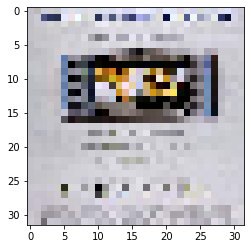

In [16]:
image_example = np.load("img_numpy/tt0220100.npy")
plt.imshow(image_example/255)
plt.show()

### Creamos dos métricas customizadas

In [17]:
def recall_class(y_true, y_pred, class_id):
    class_id_true = K.argmax(y_true, axis=-1)
    class_id_preds = K.argmax(y_pred, axis=-1)

    recall_mask = K.cast(K.equal(class_id_true, class_id), 'int32')
    class_recall_tensor = K.cast(K.equal(class_id_true, class_id_preds), 'int32') * recall_mask
    class_recall = K.sum(class_recall_tensor) / K.maximum(K.sum(recall_mask), 1)

    return class_recall

def precision_class(y_true, y_pred, class_id):
    class_id_true = K.argmax(y_true, axis=-1)
    class_id_preds = K.argmax(y_pred, axis=-1)

    precision_mask = K.cast(K.equal(class_id_preds, class_id), 'int32')
    class_prec_tensor = K.cast(K.equal(class_id_true, class_id_preds), 'int32') * precision_mask
    class_prec = K.sum(class_prec_tensor) / K.maximum(K.sum(precision_mask), 1)

    return class_prec

def f1_class(y_true, y_pred,class_id):

    class_prec = precision_class(y_true, y_pred, class_id)
    class_recall = recall_class(y_true, y_pred, class_id)
    class_f1 = 2*((class_prec*class_recall)/(class_prec+class_recall+K.epsilon()))

    return class_f1

def precision_total(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = K.cast(true_positives / (predicted_positives + K.epsilon()), 'float64')
    return precision

def custom_metric(y_true, y_pred):
  
  recall_0 = recall_class(y_true, y_pred, 0)
  f1_1 = f1_class(y_true, y_pred,1)
  precision_2 = precision_class(y_true, y_pred, 2)
  total_precision = precision_total(y_true, y_pred)

  metric = (recall_0 + f1_1 + precision_2)/3
  return metric

def custom_metric2(y_true, y_pred):
  
  recall_0 = recall_class(y_true, y_pred, 0)
  f1_1 = f1_class(y_true, y_pred,1)
  precision_2 = precision_class(y_true, y_pred, 2)
  total_precision = precision_total(y_true, y_pred)

  metric = (recall_0 + f1_1 + precision_2 + total_precision)/4
  return metric

## Generador 

Como no es posible cargar todas las imagenes y los datos tabulares en memoria nos hemos visto obligados a generar nuestro propio generador que nos permitiera ir leyendo de manera dinámica batchs de x tamaño. 

Con el generador obtenemos un vector con las siguientes posiciones (el número de elementos por cada batch vendrá determinado por el batch que hemos puesto): 
1.   Imagenes
2.   Datos tabulares
3.   Etiquetas


    

In [18]:
def custom_generator(images_list, dataframe, batch_size, numero_clasesimage_example,path_imagenes = "filtered_img/",
                     name_target_colum= "RATING_CAT",
                     ):
  
  """Generator.

    Keyword arguments:
    images_list -- lista con los nombres de la imagenes
    dataframe -- dataframe que contiene los datos tabulares
    batch_size -- tamaño del batch que queremos introducit a la red
    numero_clases -- número de clases de la variable de salida
    path_imagenes -- ruta a la carpeta donde estan las imagenes
    name_target_colum -- nombre de la columna que contiene la variable de salida
    img_width -- anchura de la imagen reducida 
    img_height -- altura de la imagen reducida
  """

  i = 0
  while True:
      batch = {'images': [], 'csv': [], 'labels': []}
      for b in range(batch_size):
          if i == len(images_list):
              i = 0
                
          # Leemos la Imagen
          image_path = images_list[i]
          
          image = np.load(path_imagenes+"/tt"+image_path+".npy")
          
          '''image = krs_image.load_img(str(path_imagenes)+"tt"+str(image_path)+".png", target_size=(img_height,img_width))
          image = krs_image.img_to_array(image,data_format="channels_last")'''
       
          # Seleccionamos la fila correspondiente del csv
          csv_row = dataframe.loc[dataframe['CODE'] == image_path]
          
          # Selccionamos la etiqueta correspondiente
          label = csv_row[name_target_colum].values
          label = tf.keras.utils.to_categorical(
              label, num_classes=numero_clases, dtype='int'
          )
          
          # Selccionamos solo las features de ese registro
          csv_features = csv_row.drop(['CODE',name_target_colum],axis=1).values
          
          # insertamos en el diccionario los datos
          batch['images'].append(image)
          batch['csv'].append(csv_features)
          
          batch['labels'].append(label)

          i = i + 1
          
      batch['images'] = np.array(batch['images'])
      batch['csv'] = np.array(batch['csv'])
      batch['labels'] = np.array(batch['labels'])

      
      yield batch['images'], batch['csv'], batch['labels']

## Modelos Neuronales

Se van a crear dos modelos (1,2) cuya salida se concatenara y se pasará al modelo 3:

1.   Modelo para las imágenes
2.   Modelo para los datos tabulares
3.   Clasificador final





1.- Modelo para el procesamiento de los datos tabulares

In [19]:
def create_mlp_embedding(categorical_vars,numeric_vars,numeric_neurons):

  input_models=[]
  output_embeddings=[]

  for categorical_var in categorical_vars:           #Creación de las capas de embedding por cada variable categórica
      
      cat_emb_name= categorical_var +'_Embedding'
      input_name= 'Input_' + categorical_var
      no_of_unique_cat  = X_train[categorical_var].nunique()
      embedding_size = int(min(np.ceil((no_of_unique_cat)/2), 50))  #Formula empírica
      input_model = Input(shape=(1,), name=input_name)
      output_model = Embedding(no_of_unique_cat, embedding_size, name=cat_emb_name)(input_model)
      output_model = Reshape(target_shape=(embedding_size,))(output_model)
      input_models.append(input_model)
      output_embeddings.append(output_model)

  for numeric_var in numeric_vars:                 #Creación de las denses asociadas a cada variable numérica

    if numeric_var != 'CODE':
  
      input_numeric = Input(shape=(1,),name=numeric_var+"_Input")
      dense_numeric = Dense(numeric_neurons)(input_numeric) 
      input_models.append(input_numeric)
      output_embeddings.append(dense_numeric)

  output = Concatenate()(output_embeddings)

  model = Model(inputs=input_models, outputs=output)
  return model,input_models

2.- Modelo para el procesamiento de las imágenes

In [20]:
def create_cnn(width, height):
    
    inputShape = (height, width, 3)
    input_img = Input(shape=inputShape,name="IMG_Input")
    
    
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(height,width))(input_img)
    x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = Flatten()(x)
    model = Model(inputs=input_img, outputs=x)
    return model,input_img

3.- Creación del clasificador que sigue a los modelos anteriores

In [21]:
def create_model(opcion):

  mlp_emb,input_mlp = create_mlp_embedding(categorical_vars,numeric_vars,numeric_neurons)
  cnn,input_cnn = create_cnn(width=32, height=32)

  if opcion == "cnn":
  
    x = Flatten()(cnn.output)
    x = tf.keras.layers.Dense(128,activation='relu', kernel_initializer='he_uniform')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(3, activation='softmax')(x)
    
    model = Model(inputs=cnn.input, outputs=x)

  elif opcion == "mlp":

    x = tf.keras.layers.BatchNormalization()(mlp_emb.output)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(256,activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(128,activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(3, activation='softmax')(x)

    model = Model(inputs=mlp_emb.input, outputs=x)

  else:
    combinedInput = concatenate([mlp_emb.output, cnn.output])

    x = tf.keras.layers.BatchNormalization()(combinedInput)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512,activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(256,activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(3, activation='softmax')(x)

    input_mlp.append(input_cnn)

    model = Model(inputs=input_mlp, outputs=x)

  return model,input_mlp

## Definición de parámetros 

In [22]:
# Generador
images_list = code_train_df['CODE'].values 
dataframe = code_train_df
batch_size = 128
numero_clases = 3
path_imagenes = "img_numpy/"
name_target_colum= "RATING_CAT"
img_width = 32
img_height = 32

# Test
images_list_test = code_test_df['CODE'].values
dataframe_test = code_test_df
batch_size_test = 256

## Modelos neuronales
#Embeddings
numeric_neurons = 16  #Numero de neuronas de la dense asignada a cada variabloe numerica

p1=6                   
p2=8
weights = {0:10, 1:p1, 2:p2}    # Penalización de los errores cometidos por cada clase (clase 0, clase 1, clase2)

#General
learning_rate = 0.00001
adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
sgd = SGD(lr=0.001)
adagrad = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
rmsprop = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
adadelta = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
adamax = tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
nadam = tf.keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)

optimizer = adam


# ATENCIÓN, AL FINAL ESTE CODIGO SOLO SE HA UTILIZADO PARA LA CREACIÓN DEL MODELO MULTI INPUT. LOS MODELOS DE SOLO DATOS TABULARES O SOLO IMAGEN SE ENCUENTRAN EN SUS RESPECTIVOS NOTEBOOKS.
# NO CAMBIAR LA VARIABLE OPCION. SI SE QUIEREN PROBAR LOS MODELOS DE IMAGEN/DATOS TABULARES ACCEDER A LOS RESPECTIVOS NOTEBOOKS
opcion = "both"

## Creaccion del generador

In [23]:
my_generator = custom_generator(images_list, dataframe, batch_size, numero_clases, path_imagenes, name_target_colum)
my_generator_test = custom_generator(images_list_test, dataframe_test, batch_size_test, numero_clases, path_imagenes, name_target_colum)

Código para comprobar que el generador funciona

In [24]:
'''numero_batchs_example = 1

for i in range (0,numero_batchs_example):
    info = next(my_generator)
    #print(info)
    print("Features: ",info[1])
    print("labels: ",info[2])
    for img in info[0]:
        plt.imshow(img/255)
        plt.show()
    print("----------------------------------")
    print("----------------------------------")'''

'numero_batchs_example = 1\n\nfor i in range (0,numero_batchs_example):\n    info = next(my_generator)\n    #print(info)\n    print("Features: ",info[1])\n    print("labels: ",info[2])\n    for img in info[0]:\n        plt.imshow(img/255)\n        plt.show()\n    print("----------------------------------")\n    print("----------------------------------")'

### Creacción Modelo Neuronal

In [25]:
model,inputs= create_model(opcion)

In [26]:
inputs

[<tf.Tensor 'Input_COLOR:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_DIRECTOR:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_GENRES_0:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_GENRES_1:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_GENRES_2:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_LANGUAGE_0:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_COUNTRY_0:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_KEYWORDS_0:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_KEYWORDS_1:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_KEYWORDS_2:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_WRITERS_0:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_CONTENT_RATING:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_KEYWORDS_DESCRIPTION:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_ACTOR_0:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_ACTOR_1:0' shape=(None, 1) dtype=float32>,
 <tf.Tensor 'Input_ACTOR_2:0' sh

### Entrenamiento

##### Modelado de los datos para introducirlos a la red

In [27]:
def tabular_data(data):

  mlp_input = np.squeeze(np.transpose(data))
  mlp_input = mlp_input.astype(int)

  tabular_dict= {
      'Input_COLOR':mlp_input[0],
      "Input_DIRECTOR":mlp_input[1],
      "Input_GENRES_0":mlp_input[2],
      "Input_GENRES_1":mlp_input[3],
      "Input_GENRES_2":mlp_input[4],
      "Input_LANGUAGE_0":mlp_input[5],
      "Input_COUNTRY_0":mlp_input[6],
      "Input_KEYWORDS_0":mlp_input[7],
      "Input_KEYWORDS_1":mlp_input[8],
      "Input_KEYWORDS_2":mlp_input[9],
      "Input_WRITERS_0":mlp_input[10],
      "Input_CONTENT_RATING":mlp_input[11],
      "Input_KEYWORDS_DESCRIPTION":mlp_input[12],
      "Input_ACTOR_0":mlp_input[13],
      "Input_ACTOR_1":mlp_input[14],
      "Input_ACTOR_2":mlp_input[15],
      "DURATION_Input":mlp_input[16],
      "YEAR_Input":mlp_input[17]
    }

  return tabular_dict

def cnn_data(data,opcion):

  cnn_input = data/255
  cnn_input = cnn_input.astype(int)

  if opcion == "cnn":
    return cnn_input
  else:
    cnn_input = {"IMG_Input":cnn_input}
    return cnn_input

def target_data(data, batch_size, numero_clases):

  output = np.reshape(data, (batch_size, numero_clases))
  output = output.astype(int)

  return output

##### Compilación del modelo

In [28]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy',custom_metric,custom_metric2])

In [29]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
IMG_Input (InputLayer)          [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         IMG_Input[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 16, 16, 32)   0           conv2d_1[0][0]                   
_______________________________________________________________________________________

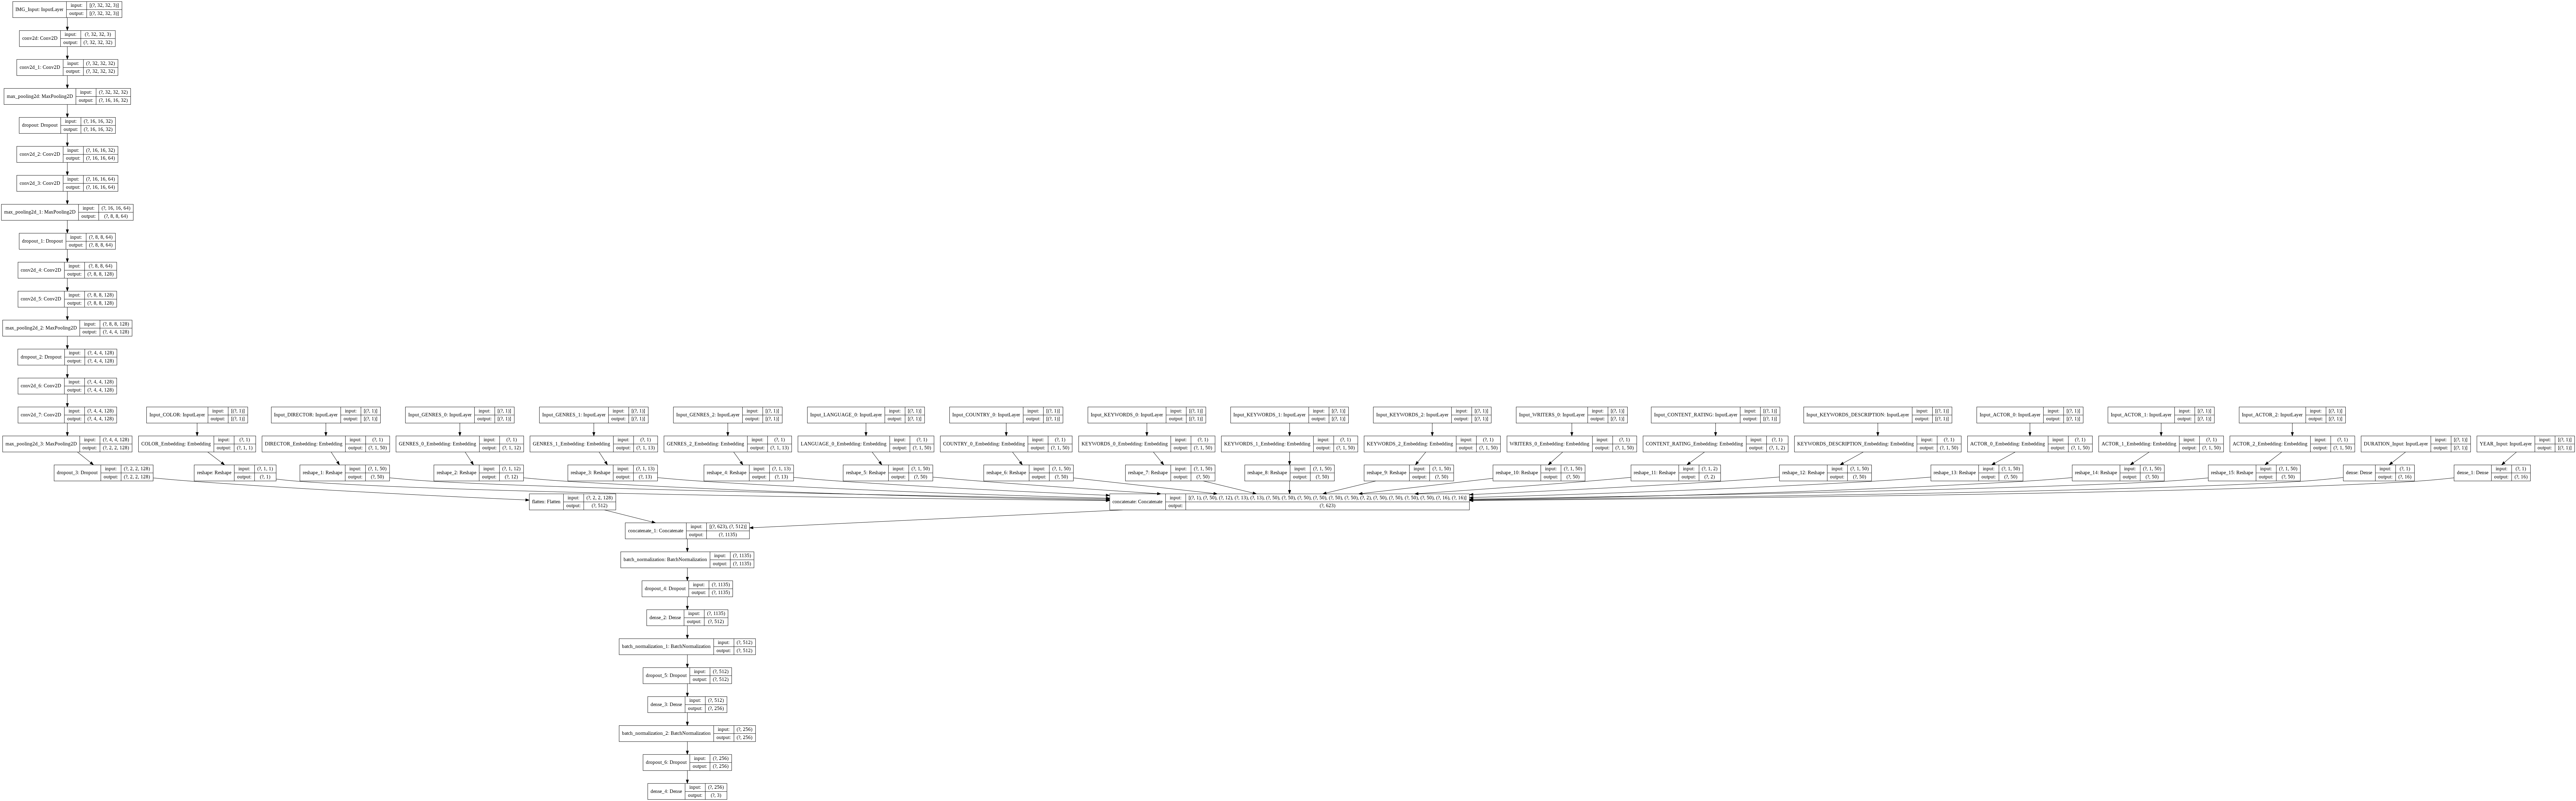

In [30]:
plot_model(model, to_file='Multiinput.png',show_shapes=True,show_layer_names=True)
printModel(retina=True, filename='Multiinput.png')

# Entrenamiento

In [32]:
# Steps es el número de veces que tiene que iterar el bucle para recorrer todo el conjunto de datos
# steps = loguitud_total_del_dataset/tamaño_del_batch
steps = int(len(code_train_df)/batch_size)
steps_test = int(len(code_test_df)/batch_size_test)

print("El número de pasos es: ",steps)

# Número de veces que vamos a entrenar sobre el conjunto de entrenamiento
iteraciones = 500

total_loss_per_iteration_test = []
total_acc_per_iteration_test = []
total_customMetric_per_iteration_test= []
total_customMetric2_per_iteration_test = []
evaluate_values_acc_loss_custom=0
best_loss = 10000
best_acc = 0
best_cm1 = 0
best_cm2 = 0

for iteracion in tqdm(range(iteraciones)):
  print("Iteración número: ", iteracion)
  
  for step in range(steps):
    # Cleaning variables for memory usage
    input_dict = dict()
    cnn_input = dict()
    input_dict_test = dict()
    cnn_input_test = dict()
    
    print("Step número: ", step)

    # info va a contener tantos registros como tamaño del batch hemos puesto en el generador
    info = next(my_generator)
    #print("Tabular_Data: ",info[1])

    # LLamadas a las funciones que devuelven los datos con el formato correcto
    input_dict = tabular_data(info[1])
    cnn_input = cnn_data(info[0],opcion)
    output = target_data(info[2], batch_size, numero_clases)

    if opcion == "cnn":
      model.fit(cnn_input, output, epochs=1,batch_size=batch_size, verbose=True)

    elif opcion == "mlp":
      model.fit(input_dict, output, epochs=1, batch_size=batch_size, verbose=True,class_weight=weights)

    else:
      input_dict.update(cnn_input)

      model.fit(input_dict, output, epochs=1, batch_size=batch_size, verbose=True,class_weight=weights)
     
  evaluate_values_acc_loss_custom = [0,0,0,0]
  total_confusion=[[ 0,   0,   0],[0,   0 ,  0],[ 0,   0,   0]]

  for evaluate_step in range(steps_test):
  
    # Cleaning variables for memory usage
    input_dict = dict()
    cnn_input = dict()
    input_dict_test = dict()
    cnn_input_test = dict()
    print("Step TEST número: ", evaluate_step)
    
    info_test = next(my_generator_test)
    #print("Tabular_Data: ",info[1])

    # LLamadas a las funciones que devuelven los datos con el formato correcto
    input_dict_test = tabular_data(info_test[1])
    cnn_input_test = cnn_data(info_test[0],opcion)

    output_test = target_data(info_test[2], batch_size_test, numero_clases)

    #print("Salida esperada: ",output)
    if opcion == "cnn":
      evaluate_values = model.evaluate(cnn_input_test, output_test,batch_size=batch_size_test)
    
    elif opcion == "mlp":
      evaluate_values = model.evaluate(input_dict_test, output_test,batch_size=batch_size_test)
     
    else:
      input_dict_test.update(cnn_input_test)
      evaluate_values = model.evaluate(input_dict_test, output_test,batch_size=batch_size_test)
      y_pred = model.predict(input_dict_test)
      confusion = confusion_matrix(output_test.argmax(axis=1), y_pred.argmax(axis=1))
      total_confusion = np.add(total_confusion, confusion)
     
    input_dict_test = dict()
    
    evaluate_values_acc_loss_custom = list(map(operator.add, evaluate_values_acc_loss_custom,evaluate_values))

 

  # Para las graficas
  total_loss_per_iteration_test = total_loss_per_iteration_test + [evaluate_values_acc_loss_custom[0]/steps_test]
  total_acc_per_iteration_test = total_acc_per_iteration_test + [evaluate_values_acc_loss_custom[1]/steps_test]
  total_customMetric_per_iteration_test = total_customMetric_per_iteration_test + [evaluate_values_acc_loss_custom[2]/steps_test]
  total_customMetric2_per_iteration_test = total_customMetric2_per_iteration_test + [evaluate_values_acc_loss_custom[3]/steps_test]


  

  print("\nMedia accuracy en test: "+str(evaluate_values_acc_loss_custom[1]/steps_test)+" Media loss en test: "+str(evaluate_values_acc_loss_custom[0]/steps_test)+" Media de custom metric en test: "+str(evaluate_values_acc_loss_custom[2]/steps_test)+" Media de custom metric2 en test: "+str(evaluate_values_acc_loss_custom[3]/steps_test))
  print("----------------------------------")
  print("----------------------------------")

  # Checkpoints
  if evaluate_values_acc_loss_custom[0]/steps_test < best_loss:
    best_loss = evaluate_values_acc_loss_custom[0]/steps_test
    model.save_weights('/content/drive/My Drive/Modelos_multi_input/best_loss_model.h5')

  if evaluate_values_acc_loss_custom[1]/steps_test > best_acc:
    best_acc = evaluate_values_acc_loss_custom[1]/steps_test
    model.save_weights('/content/drive/My Drive/Modelos_multi_input/best_acc_model.h5')

  if evaluate_values_acc_loss_custom[2]/steps_test > best_cm1:
    best_cm1 = evaluate_values_acc_loss_custom[2]/steps_test
    model.save_weights('/content/drive/My Drive/Modelos_multi_input/best_cm1_model.h5')

  if evaluate_values_acc_loss_custom[3]/steps_test > best_cm2:
    best_cm2 = evaluate_values_acc_loss_custom[3]/steps_test
    model.save_weights('/content/drive/My Drive/Modelos_multi_input/best_cm2_model.h5')





  0%|          | 0/500 [00:00<?, ?it/s]

El número de pasos es:  372
Iteración número:  0
Step número:  0
1/1 [==============================] - 0s 2ms/step - loss: 15.1129 - accuracy: 0.3203 - custom_metric: 0.3610 - custom_metric2: 0.3541
Step número:  1
1/1 [==============================] - 0s 2ms/step - loss: 13.5161 - accuracy: 0.3828 - custom_metric: 0.4198 - custom_metric2: 0.4083
Step número:  2
1/1 [==============================] - 0s 2ms/step - loss: 15.2789 - accuracy: 0.2891 - custom_metric: 0.3250 - custom_metric2: 0.3205
Step número:  3
1/1 [==============================] - 0s 2ms/step - loss: 14.9644 - accuracy: 0.2500 - custom_metric: 0.2880 - custom_metric2: 0.2791
Step número:  4
1/1 [==============================] - 0s 2ms/step - loss: 15.1418 - accuracy: 0.3047 - custom_metric: 0.3470 - custom_metric2: 0.3352
Step número:  5
1/1 [==============================] - 0s 2ms/step - loss: 16.3575 - accuracy: 0.3203 - custom_metric: 0.3862 - custom_metric2: 0.3655
Step número:  6
1/1 [========================

KeyboardInterrupt: ignored

### Evaluacion de los checkpoins obtenidos

In [33]:
#Preprocesamiento necesario para poder hacer los predicts
data = code_test_df
FEATURES = ['YEAR','DURATION','COLOR','DIRECTOR','GENRES_0','GENRES_1','GENRES_2','LANGUAGE_0','COUNTRY_0','KEYWORDS_0','KEYWORDS_1','KEYWORDS_2','WRITERS_0','CONTENT_RATING','KEYWORDS_DESCRIPTION','ACTOR_0','ACTOR_1','ACTOR_2']
X_test = data[FEATURES]
y_test = np.array(data.RATING_CAT.values).astype(int)
codes = data.CODE.values
image_list = []
for cod in tqdm(codes):
  image = np.load("img_numpy"+"/tt"+cod+".npy")
  image = image/255
  image_list.append(image)



  0%|          | 0/11925 [00:00<?, ?it/s]

  3%|▎         | 314/11925 [00:00<00:03, 3136.94it/s]

  6%|▌         | 673/11925 [00:00<00:03, 3258.30it/s]

  9%|▊         | 1038/11925 [00:00<00:03, 3364.58it/s]

 12%|█▏        | 1399/11925 [00:00<00:03, 3431.93it/s]

 15%|█▍        | 1751/11925 [00:00<00:02, 3457.09it/s]

 18%|█▊        | 2101/11925 [00:00<00:02, 3468.97it/s]

 21%|██        | 2464/11925 [00:00<00:02, 3514.93it/s]

 24%|██▎       | 2825/11925 [00:00<00:02, 3542.79it/s]

 27%|██▋       | 3167/11925 [00:00<00:02, 3502.77it/s]

 29%|██▉       | 3515/11925 [00:01<00:02, 3495.84it/s]

 32%|███▏      | 3860/11925 [00:01<00:02, 3479.97it/s]

 35%|███▌      | 4203/11925 [00:01<00:02, 3461.67it/s]

 38%|███▊      | 4549/11925 [00:01<00:02, 3460.31it/s]

 41%|████      | 4905/11925 [00:01<00:02, 3489.28it/s]

 44%|████▍     | 5258/11925 [00:01<00:01, 3498.87it/s]

 47%|████▋     | 5607/11925 [00:01<00:01, 3494.55it/s]

 50%|████▉     | 5958/11925 [00:01<00:01, 3498.97it/s]

 53%|

In [34]:
#Preprocesamiento necesario para poder hacer los predicts
image_list = np.array(image_list)
image_list = np.array(image_list.astype(int))

COLOR = np.array(X_test.COLOR.values.astype(int))
DIRECTOR = np.array(X_test.DIRECTOR.values.astype(int))
GENRES_0 = np.array(X_test.GENRES_0.values.astype(int))
GENRES_1 = np.array(X_test.GENRES_1.values.astype(int))
GENRES_2 = np.array(X_test.GENRES_2.values.astype(int))
LANGUAGE_0 = np.array(X_test.LANGUAGE_0.values.astype(int))
COUNTRY_0 = np.array(X_test.COUNTRY_0.values.astype(int))
KEYWORDS_0 = np.array(X_test.KEYWORDS_0.values.astype(int))
KEYWORDS_1 = np.array(X_test.KEYWORDS_1.values.astype(int))
KEYWORDS_2 = np.array(X_test.KEYWORDS_2.values.astype(int))
WRITERS_0 = np.array(X_test.WRITERS_0.values.astype(int))
CONTENT_RATING = np.array(X_test.CONTENT_RATING.values.astype(int))
KEYWORDS_DESCRIPTION = np.array(X_test.KEYWORDS_DESCRIPTION.values.astype(int))
ACTOR_0 = np.array(X_test.ACTOR_0.values.astype(int))
ACTOR_1 = np.array(X_test.ACTOR_1.values.astype(int))
ACTOR_2 = np.array(X_test.ACTOR_2.values.astype(int))
DURATION = np.array(X_test.DURATION.values.astype(int))
YEAR = np.array(X_test.YEAR.values.astype(int))




tabular_dict= {
      'Input_COLOR':COLOR,
      "Input_DIRECTOR":DIRECTOR,
      "Input_GENRES_0":GENRES_0,
      "Input_GENRES_1":GENRES_1,
      "Input_GENRES_2":GENRES_2,
      "Input_LANGUAGE_0":LANGUAGE_0,
      "Input_COUNTRY_0":COUNTRY_0,
      "Input_KEYWORDS_0":KEYWORDS_0,
      "Input_KEYWORDS_1":KEYWORDS_1,
      "Input_KEYWORDS_2":KEYWORDS_2,
      "Input_WRITERS_0":WRITERS_0,
      "Input_CONTENT_RATING":CONTENT_RATING,
      "Input_KEYWORDS_DESCRIPTION":KEYWORDS_DESCRIPTION,
      "Input_ACTOR_0":ACTOR_0,
      "Input_ACTOR_1":ACTOR_1,
      "Input_ACTOR_2":ACTOR_2,
      "DURATION_Input":DURATION,
      "YEAR_Input":YEAR
    }

cnn_input = {"IMG_Input":image_list}

tabular_dict.update(cnn_input)

In [35]:
y_test_one_hot = tf.keras.utils.to_categorical(
              y_test, num_classes=3, dtype='int'
          )

In [36]:
#Función para dibujar la confusión matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Evaluación del checkpoint cargado

373/373 [==============================] - 3s 8ms/step - loss: 0.8146 - accuracy: 0.6143 - custom_metric: 0.6166 - custom_metric2: 0.6283
Confusion matrix, without normalization
[[1269  843  114]
 [ 802 3245 1186]
 [ 110 1545 2811]]
              precision    recall  f1-score   support

         0-5       0.58      0.57      0.58      2226
       5-6.5       0.58      0.62      0.60      5233
      6.5-10       0.68      0.63      0.66      4466

    accuracy                           0.61     11925
   macro avg       0.61      0.61      0.61     11925
weighted avg       0.62      0.61      0.62     11925



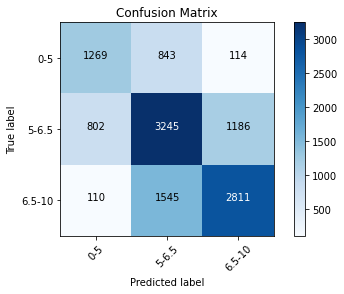

In [37]:
model.load_weights('/content/drive/My Drive/TFM/Codigos/ClasificadorMultiInput/Modelos_multi_input/best_cm1_model.h5')
model.evaluate(tabular_dict,y_test_one_hot)
y_pred = model.predict(tabular_dict)

matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
target_names = ['0-5', '5-6.5', '6.5-10']
plot_confusion_matrix(cm=matrix, classes=target_names, title='Confusion Matrix')
print(classification_report(y_test, y_pred.argmax(axis=1), target_names=target_names))


### Proceso de guardado en formato accesible para la app

In [ ]:
model.save('Modelo_multi_input_App.h5')

In [ ]:
model = load_model('Modelo_multi_input_App.h5',custom_objects={'custom_metric':custom_metric,'custom_metric2':custom_metric2},compile=False)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
model.evaluate(tabular_dict,y_test_one_hot)

373/373 [==============================] - 2s 6ms/step - loss: 0.8146 - accuracy: 0.6143


[0.8146366477012634, 0.6142557859420776]

In [ ]:
model.save('/content/drive/My Drive/TFM/Codigos/Modelos_Arquitecturas_clasificación/Multi_input_Modelo')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/TFM/Codigos/Modelos_Arquitecturas_clasificación/Multi_input_Modelo/assets


### Evaluación de varios checkpoints al mismo tiempo

In [38]:
path = "/content/drive/My Drive/TFM/Codigos/ClasificadorMultiInput/Modelos_multi_input"
dir_list = os.listdir(path)
len(dir_list)

1

best_cm1_model.h5
373/373 [==============================] - 3s 8ms/step - loss: 0.8146 - accuracy: 0.6143 - custom_metric: 0.6166 - custom_metric2: 0.6283
Confusion matrix, without normalization
[[1269  843  114]
 [ 802 3245 1186]
 [ 110 1545 2811]]
              precision    recall  f1-score   support

         0-5       0.58      0.57      0.58      2226
       5-6.5       0.58      0.62      0.60      5233
      6.5-10       0.68      0.63      0.66      4466

    accuracy                           0.61     11925
   macro avg       0.61      0.61      0.61     11925
weighted avg       0.62      0.61      0.62     11925

Pulse una tecla para continuar:


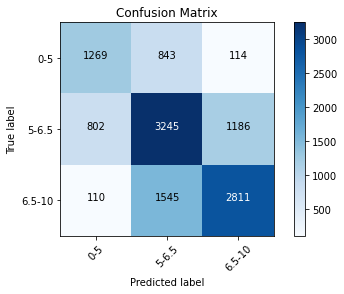

In [39]:
for mod in dir_list:

  print(mod)
  model.load_weights('/content/drive/My Drive/TFM/Codigos/ClasificadorMultiInput/Modelos_multi_input/'+mod)
  model.evaluate(tabular_dict,y_test_one_hot)
  y_pred = model.predict(tabular_dict)

  matrix = confusion_matrix(y_test, y_pred.argmax(axis=1))
  target_names = ['0-5', '5-6.5', '6.5-10']
  plot_confusion_matrix(cm=matrix, classes=target_names, title='Confusion Matrix')
  print(classification_report(y_test, y_pred.argmax(axis=1), target_names=target_names))

  input('Pulse una tecla para continuar:')
  

### Classification Report al final del entrenamiento (sin checkpoints)



In [ ]:
precision_2 = (total_confusion[2,2])/(total_confusion[0,2]+total_confusion[1,2]+total_confusion[2,2])
recall_0 = (total_confusion[0,0])/(total_confusion[0,0]+total_confusion[0,1]+total_confusion[0,2])

precision_1 = (total_confusion[1,1])/(total_confusion[0,1]+total_confusion[1,1]+total_confusion[2,1])
recall_1 = (total_confusion[1,1])/(total_confusion[1,1]+total_confusion[1,0]+total_confusion[1,2])

f1_1 = 2*((precision_1*recall_1)/(precision_1+recall_1))

In [ ]:
print("Recall clase 0: ",recall_0)
print("F1 Score clase 1: ",f1_1)
print("Precision clase 2: ",precision_2)

Recall clase 0:  1.0
F1 Score clase 1:  nan
Precision clase 2:  nan


## Para hacer una predicción aislada

In [ ]:
tabular_dict= {
      'Input_COLOR':np.array([1]),
      "Input_DIRECTOR":np.array([1]),
      "Input_GENRES_0":np.array([1]),
      "Input_GENRES_1":np.array([1]),
      "Input_GENRES_2":np.array([1]),
      "Input_LANGUAGE_0":np.array([1]),
      "Input_COUNTRY_0":np.array([1]),
      "Input_KEYWORDS_0":np.array([1]),
      "Input_KEYWORDS_1":np.array([1]),
      "Input_KEYWORDS_2":np.array([1]),
      "Input_WRITERS_0":np.array([1]),
      "Input_CONTENT_RATING":np.array([1]),
      "Input_KEYWORDS_DESCRIPTION":np.array([1]),
      "Input_ACTOR_0":np.array([1]),
      "Input_ACTOR_1":np.array([1]),
      "Input_ACTOR_2":np.array([1]),
      "DURATION_Input":np.array([1]),
      "YEAR_Input":np.array([1])
    }
image_example = krs_image.load_img("filtered_img/tt0220100.png", target_size=(134,91))
image_example = krs_image.img_to_array(image_example,data_format="channels_last")

cnn_input = image_example/255
cnn_input = np.array([cnn_input.astype(int)])

cnn_input = {"IMG_Input":cnn_input}

tabular_dict.update(cnn_input)


In [ ]:
model.predict(tabular_dict)

array([[0.05244796, 0.65064114, 0.2969109 ]], dtype=float32)